<div style="background-color: #BCDBF5 ; padding: 10px">
	<h1>The Game of Chaos</h1>
  <h2>The rules:</h2>

  <ol>
    <li>Choose a random starting point within the triangle ABC</li>
    <li>Roll die</li>
    <li>Connect the point</li>
    	<ul>
    		<li>with edge A, when you roll a <b>1</b> or <b>2</b></li>
    		<li>with edge B, when you roll a <b>3</b> or <b>4</b></li>
    		<li>with edge C, when you roll a <b>5</b> or <b>6</b></li>
    	</ul>	
    <li>Repeat step 2</li>	
  </ol>
</div>





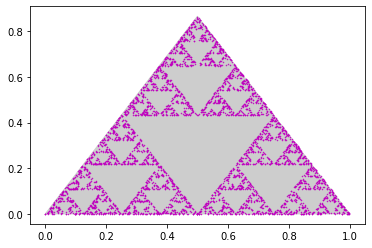

In [5]:
import numpy as np
import pylab 
from random import randint
import matplotlib.pyplot as plt

#returns the x and y coordinates of the midpoint of two points  
def get_midpoint(point1, point2):
    return [(point1[0] + point2[0])/2, (point1[1] + point2[1])/2]

#initialze current point to 0, 0
current_point = [0,0]  

#set number of turns 
num_turns = 5000

# our equilateral triangle vertices
vertex_a = [0,0]
vertex_b = [1,0]
vertex_c = [.5,np.sqrt(3)/2]

#array of vertices 
vertices = np.array([vertex_a, vertex_b, vertex_c])

#plt.figure(figsize=(5,5))

triangle = plt.Polygon(vertices[:3,:], color='#CDCDCD')
plt.gca().add_patch(triangle)

pylab.plot(vertex_a[0],vertex_b[1],'m.',markersize=1)

#returns ranom int to represent die roll (1-6)
def roll_die():
    roll = randint(1,7)
    return roll

#Mark current point based on die roll  
for turn in range(num_turns):
    current_roll = roll_die()    
    if current_roll == 1 or current_roll == 2:
        current_point = get_midpoint(current_point, vertex_a)
    elif current_roll == 3 or current_roll == 4:
        current_point = get_midpoint(current_point, vertex_b)
    elif current_roll == 5 or current_roll == 6:
        current_point = get_midpoint(current_point, vertex_c)
    # plot the new current point
    pylab.plot(current_point[0],current_point[1],'m.',markersize=1)

pylab.show()

Ans
2. 

3. 

4. 